# Introduction to Seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data available

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Styling

In [4]:
sns.set_theme()     # Apply the default theme

# Numerical Plots
* **Distribution**: Hist, KDE (Kernel Density Estimate), Displot
* **Bar Plot**
* **Count Plot**
* **Facet Plot**: Tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột
* **Box Plot**: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tử của chúng
* **Join Plot**:
* **Pair Plot**:
* **Heat Map**: Một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

### Distribution Plot

In [5]:
tips_df = sns.load_dataset('tips')

In [6]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


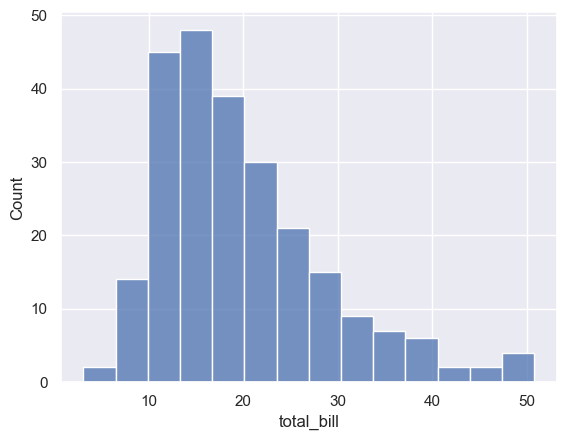

In [7]:
sns.histplot(data=tips_df["total_bill"]);

In [8]:
tips_df['total_bill'].value_counts().sort_values(ascending = False)

13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

### KDE Plot

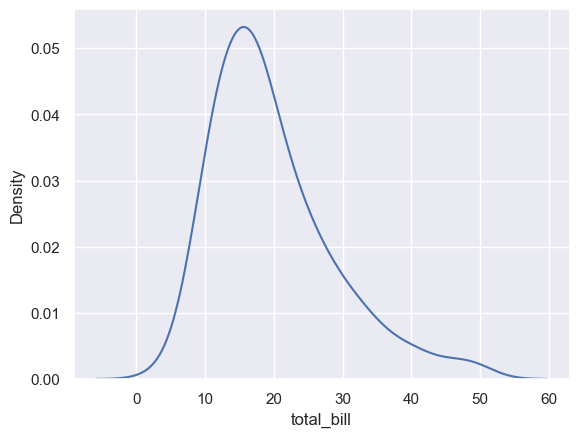

In [9]:
sns.kdeplot(data=tips_df['total_bill']);

### Displot

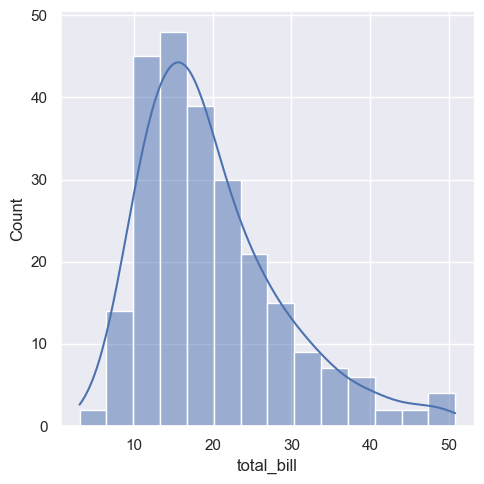

In [10]:
sns.displot(data = tips_df, x = "total_bill", kde = True);

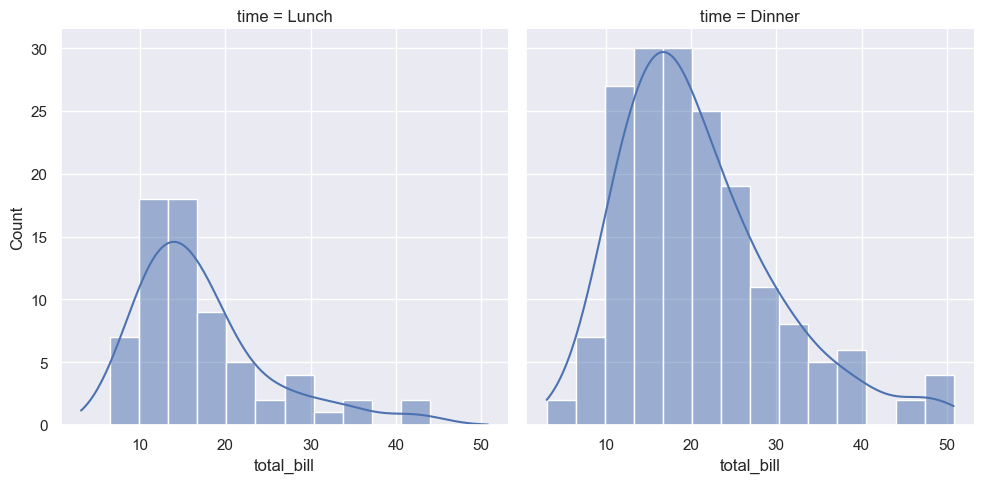

In [11]:
sns.displot(data = tips_df, x = "total_bill",col="time", kde = True);

# Categorical Plots


### Bar Plots

In [12]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


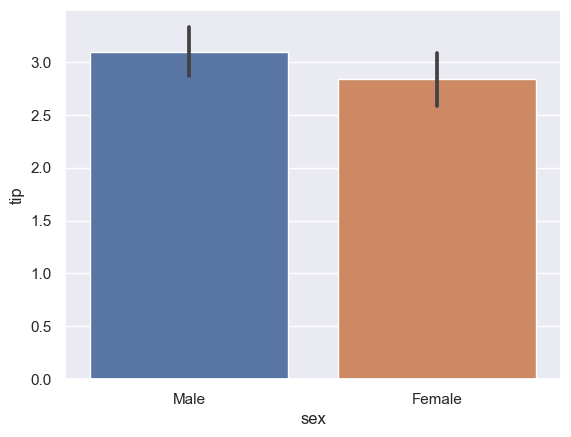

In [13]:
sns.barplot(data=tips_df, x = 'sex', y = 'tip', estimator=np.mean);

### Count Plot

In [14]:
tips_df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

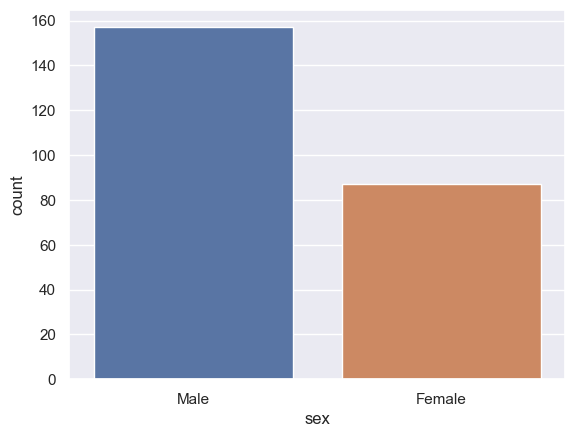

In [15]:
sns.countplot(data=tips_df, x="sex");

### Box Plot


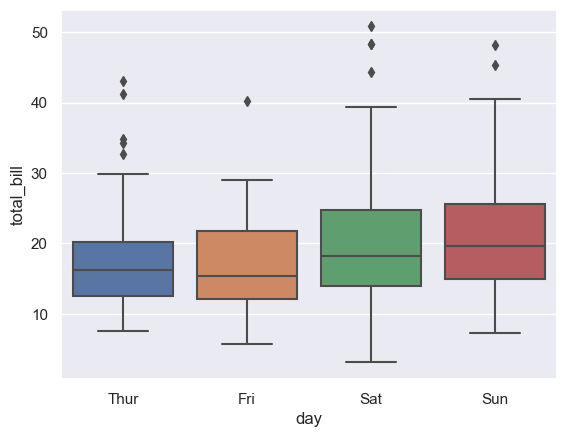

In [16]:
sns.boxplot(data=tips_df, x = 'day', y = 'total_bill');

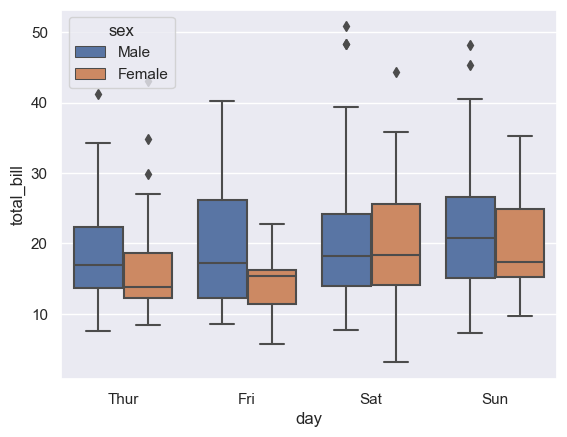

In [17]:
sns.boxplot(data=tips_df, x = 'day', y = 'total_bill', hue='sex');

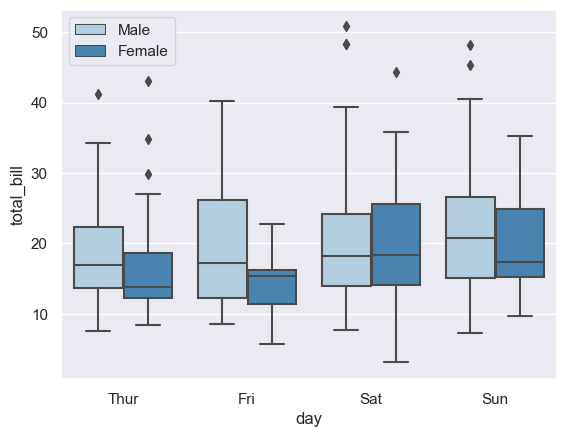

In [18]:
sns.boxplot(data=tips_df, x = 'day', y = 'total_bill', hue='sex', palette='Blues');

plt.legend(loc = 0) # Remove label

### Facet Grid

In [19]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


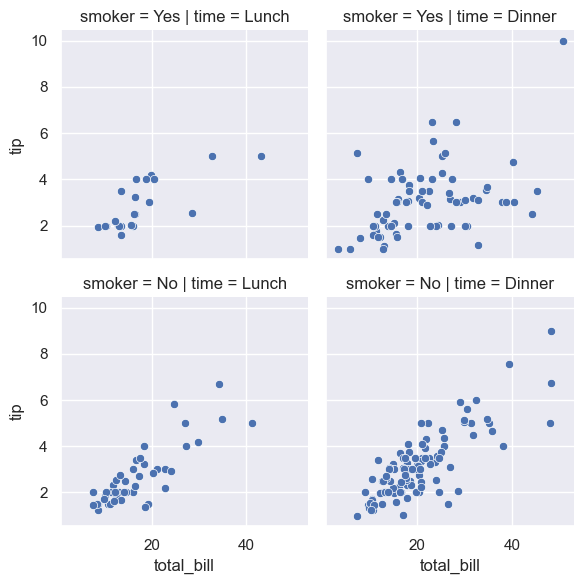

In [20]:
tips_fg = sns.FacetGrid(data=tips_df, row='smoker', col='time');  # Create a class instance of Facet Grid class

tips_fg.map(sns.scatterplot, 'total_bill', 'tip');

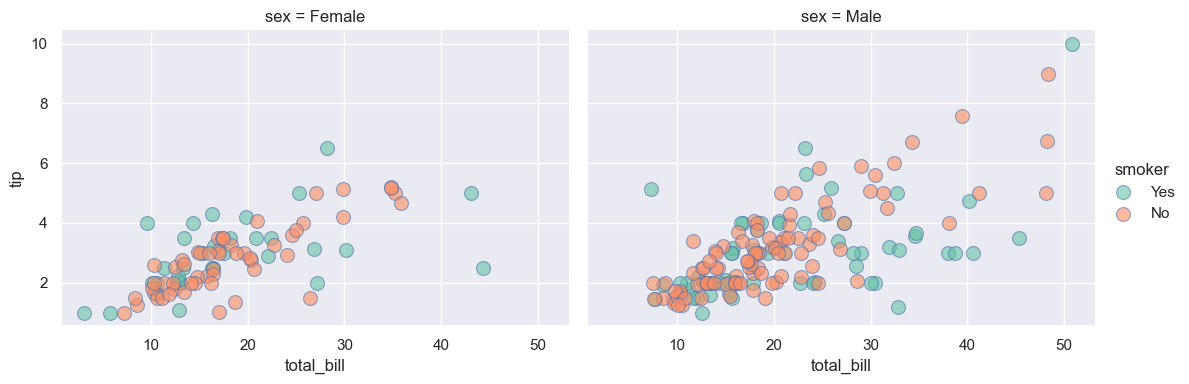

In [29]:
new_fg = sns.FacetGrid(data = tips_df, col="sex", col_order=['Female', 'Male'],palette='Set2', hue="smoker", height=4, aspect=1.4)
new_fg.map(sns.scatterplot, 'total_bill', 'tip', s= 100, edgecolor = 'b', alpha = 0.6);
new_fg.add_legend();

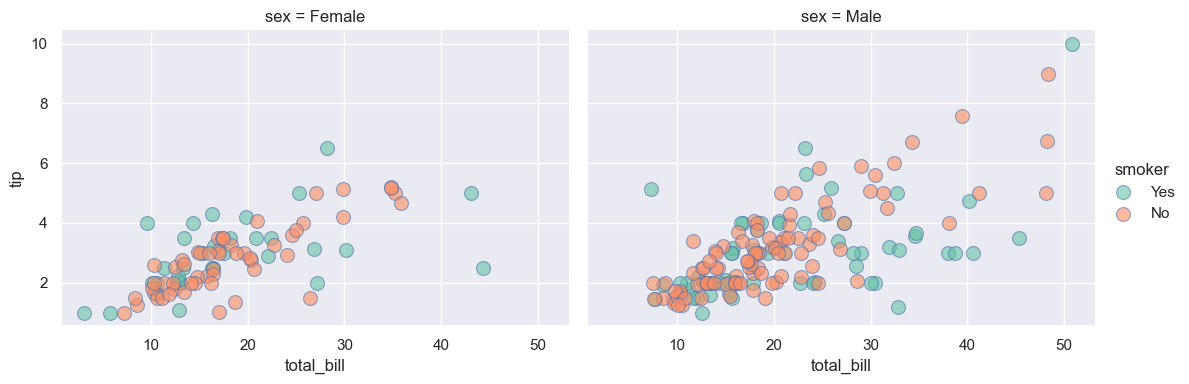

In [30]:
# Result like above
kws = dict(s= 100, edgecolor = 'b', alpha = 0.6)
new_fg = sns.FacetGrid(data = tips_df, col="sex", col_order=['Female', 'Male'],palette='Set2', hue="smoker", height=4, aspect=1.4)
new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws);
new_fg.add_legend();

### Joint Plot

In [33]:
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


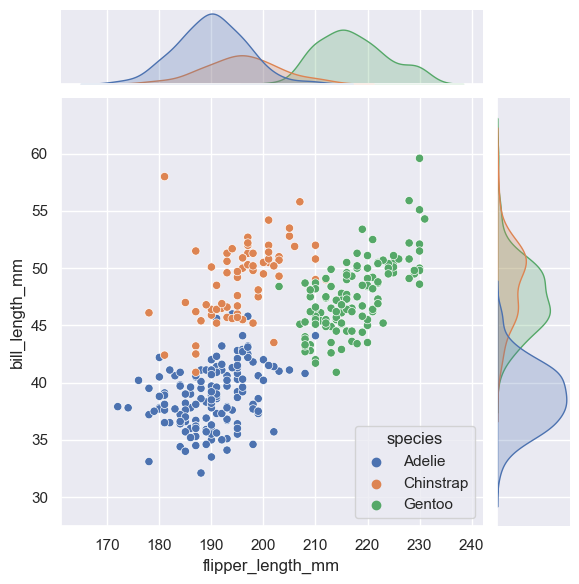

In [35]:
sns.jointplot(data=penguins_df, x="flipper_length_mm", y = "bill_length_mm", hue="species");

### Pair Plots

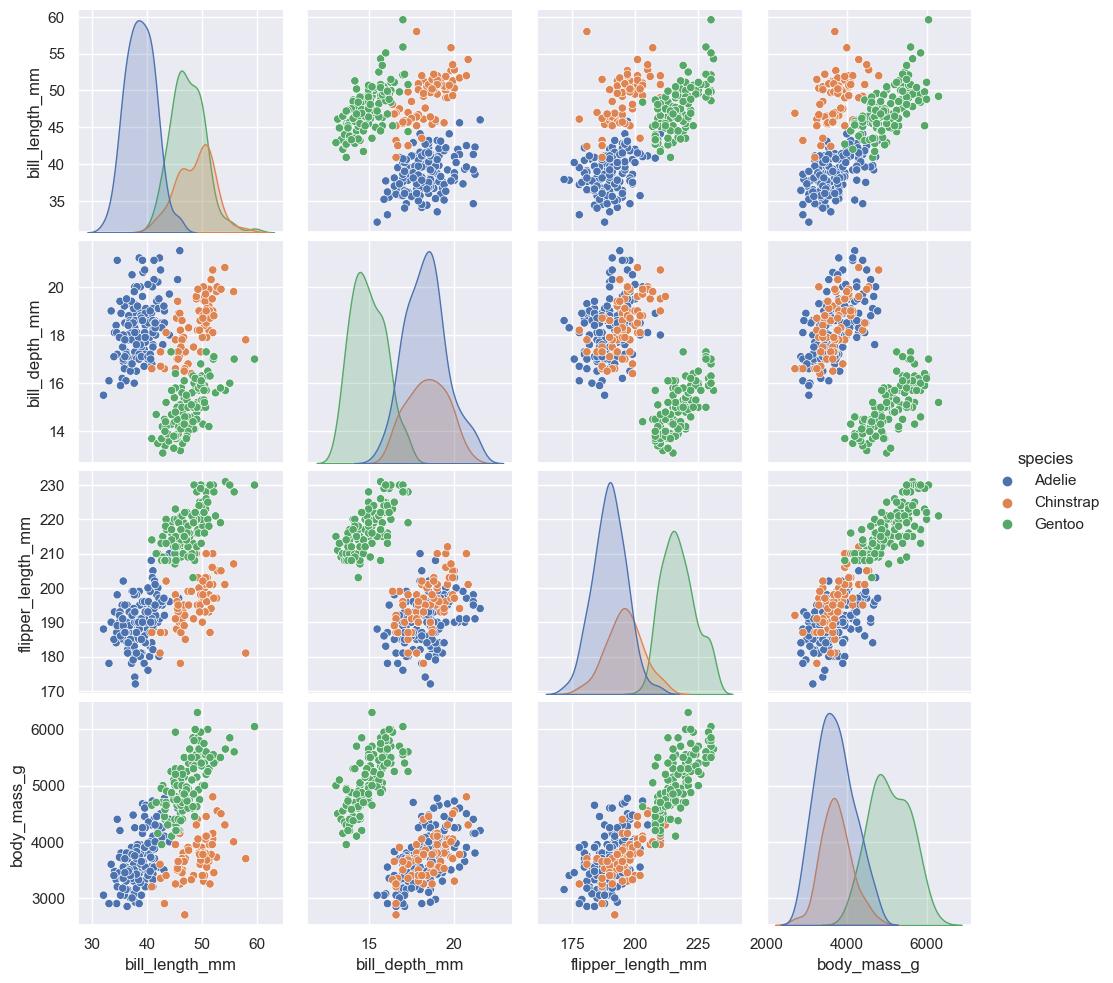

In [37]:
sns.pairplot(data=penguins_df, hue='species');

### Heatmaps

In [41]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [42]:
flights = pd.pivot_table(flights_df, index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


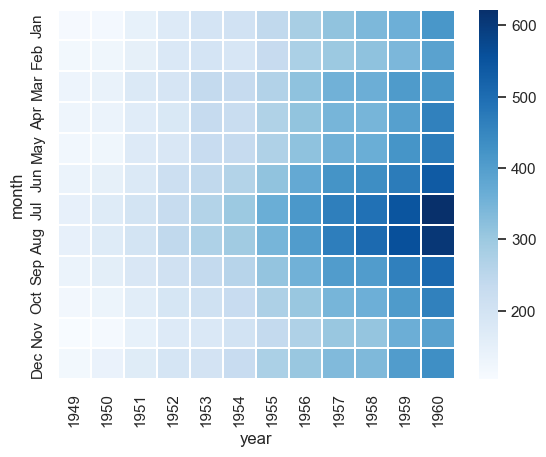

In [46]:
sns.heatmap(data=flights, cmap='Blues', linecolor = 'white', linewidth = '0.1');

# Implementation

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
# Load dataset
cereal_df = pd.read_csv('./data/cereal.csv')
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [51]:
# Drop fields
fields = ['shelf', 'weight', 'cups', 'rating']
cereal_df = cereal_df.drop(fields, axis=1);
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [54]:
# Corr()

cereal_corr = cereal_df.corr() # Get correlation data
cereal_corr

C:\Users\phanp\AppData\Local\Temp\ipykernel_127076\1321251082.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cereal_corr = cereal_df.corr() # Get correlation data


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [55]:
# ones_like can build a matrix of booleans (T, F) with the same shape as our data
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [58]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [60]:
# np's triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

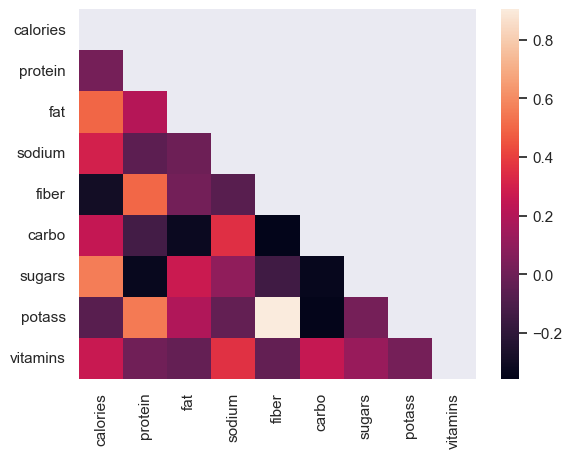

In [62]:
sns.heatmap(data=cereal_corr, mask=mask);

In [65]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [67]:
adjusted_cereal_corr = cereal_corr.iloc[1:,:-1]

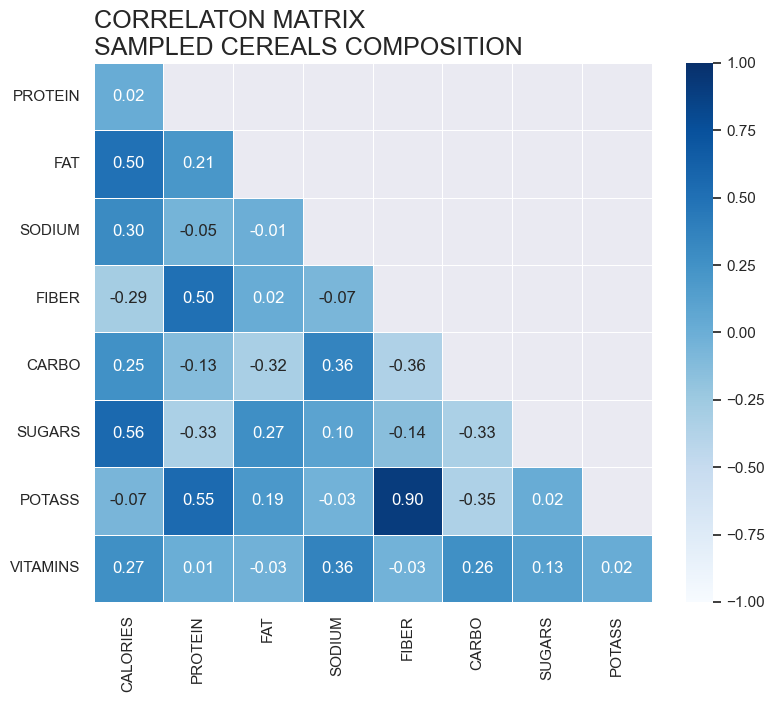

In [87]:
fig, ax = plt.subplots(figsize = (9,7))
sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot = True, fmt =".2f", cmap="Blues", vmin = -1, vmax=1, 
            linecolor = 'white', linewidths = '0.5');
yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation = 0)
ax.set_xticklabels(xticks, rotation = 90);
title = 'CORRELATON MATRIX\nSAMPLED CEREALS COMPOSITION'
ax.set_title(title, loc='left', fontsize = 18 );